# Exercise 1 
This question involves the use of simple linear regression on the Auto data set.

In [1]:
auto = read.table('./data/auto.data', header=TRUE, na.strings='?')
auto = na.omit(auto)
# auto[['origin']] = as.factor(auto[['origin']])
# auto[['cylinders']] = as.factor(auto[['cylinders']])
head(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


## Task (a)
Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results.

In [2]:
library("ISLR")

linear_model = lm(mpg ~ horsepower, data = auto)
summary(linear_model)


Call:
lm(formula = mpg ~ horsepower, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


### I. Is there a relationship between the predictor and the response?
**Definitely yes**. Because p-value is close to zero (p-value < 2.2e-16) and $R^2$ is relatively high ($R^2$ = 0.6049).

### II. How strong is the relationship between the predictor and the response?
The $R^2$ value indicates that about 60.49% of the variation in mpg is due to horsepower.

### III. Is the relationship between the predictor and the response positive or negative?
**Negative**. Because the fitted linear model gives us the following equation:

$mpg = -0.157845 \times horsepower + 39.935861$

### IV. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [3]:
# Predicted mpg associated with horsepower of 98
predict(linear_model, data.frame(horsepower = c(98)))

1 
24.46708

In [4]:
# 95% prediction interval
predict(linear_model, data.frame(horsepower = auto$horsepower), interval ="prediction")

,fit,lwr,upr
1,19.416046,9.7532948,29.07880
2,13.891480,4.2037318,23.57923
3,16.259151,6.5845976,25.93370
4,16.259151,6.5845976,25.93370
5,17.837598,8.1697749,27.50542
6,8.682604,-1.0471901,18.41240
7,5.210020,-4.5576558,14.97770
8,5.999243,-3.7591362,15.75762
9,4.420796,-5.3565771,14.19817
10,9.945362,0.2273963,19.66333


In [5]:
# 95% confidence interval
predict(linear_model, data.frame(horsepower = auto$horsepower), interval ="confidence")

,fit,lwr,upr
1,19.416046,18.831250,20.000841
2,13.891480,12.982802,14.800158
3,16.259151,15.504025,17.014277
4,16.259151,15.504025,17.014277
5,17.837598,17.174242,18.500955
6,8.682604,7.401151,9.964056
7,5.210020,3.667064,6.752976
8,5.999243,4.516273,7.482214
9,4.420796,2.817595,6.023998
10,9.945362,8.757051,11.133672


## Task (b)
Plot the response and the predictor. Use the abline() function to display the least squares regression line.

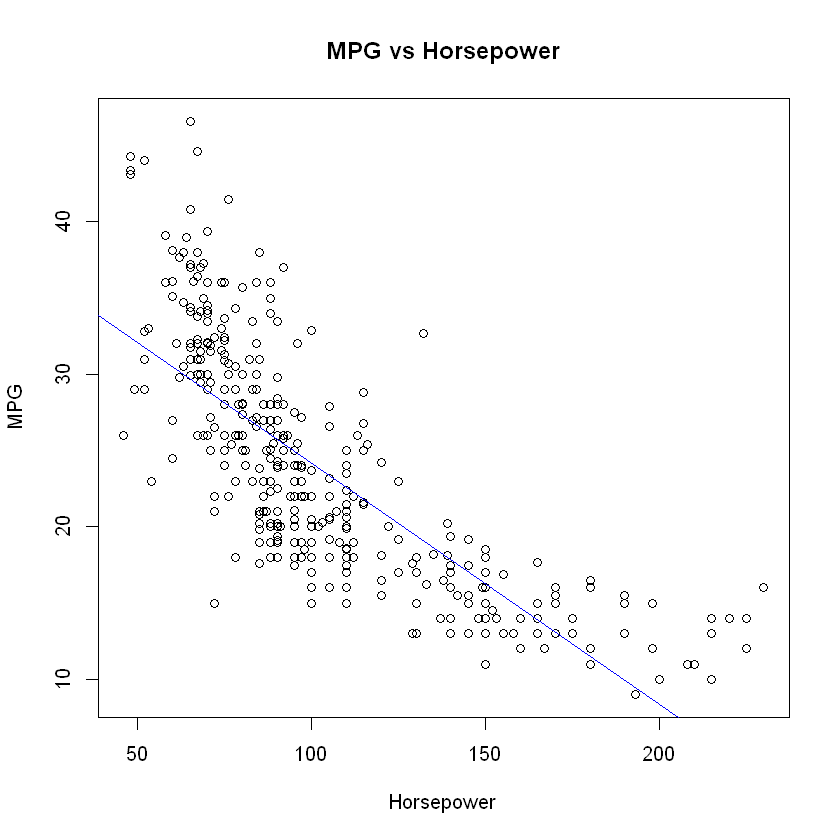

In [6]:
plot(mpg~horsepower, data=auto, main = "MPG vs Horsepower", xlab = "Horsepower", ylab ="MPG")
abline(coef = coef(linear_model), col ="blue")

## Task (c) 
Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit

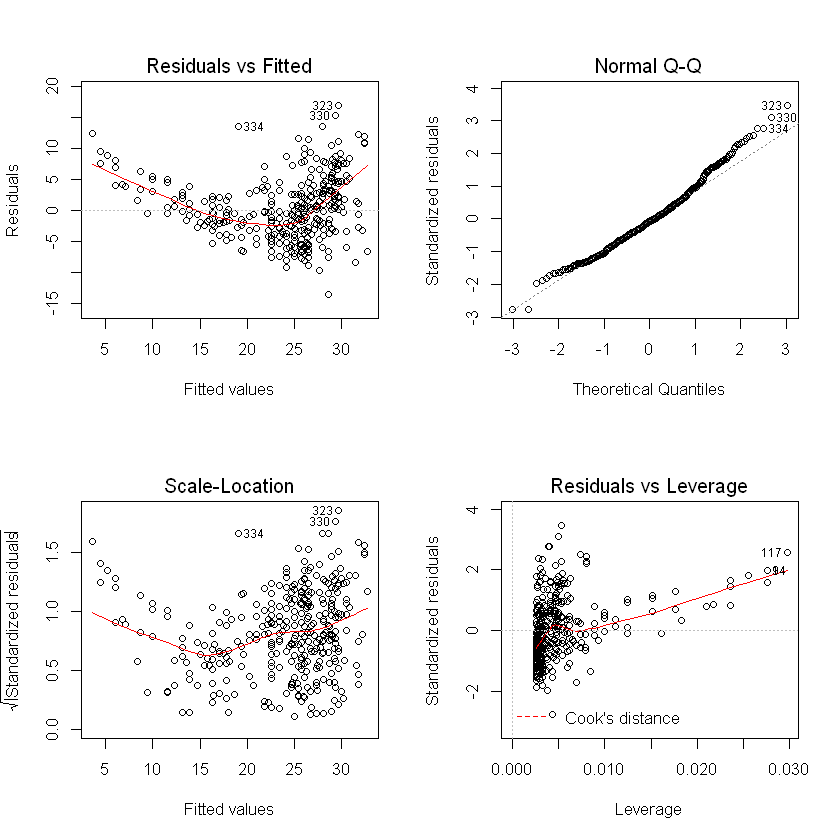

In [7]:
par(mfrow=c(2,2))
plot(linear_model)

- The first plot shows a pattern U-shaped between the residuals and the fitted values, indicating a non-linear relationship between the predictor and response variables.
- The second plot shows that the residuals are normally distributed.
- The third plot shows that the variance of the errors is constant. 
- The fourth plot indicates that there is no leverage point in the data.

# Exercise 2
This question involves the use of multiple linear regression on the Auto data set.

## Task (a)
Produce a scatterplot matrix which includes all of the variables in the data set.

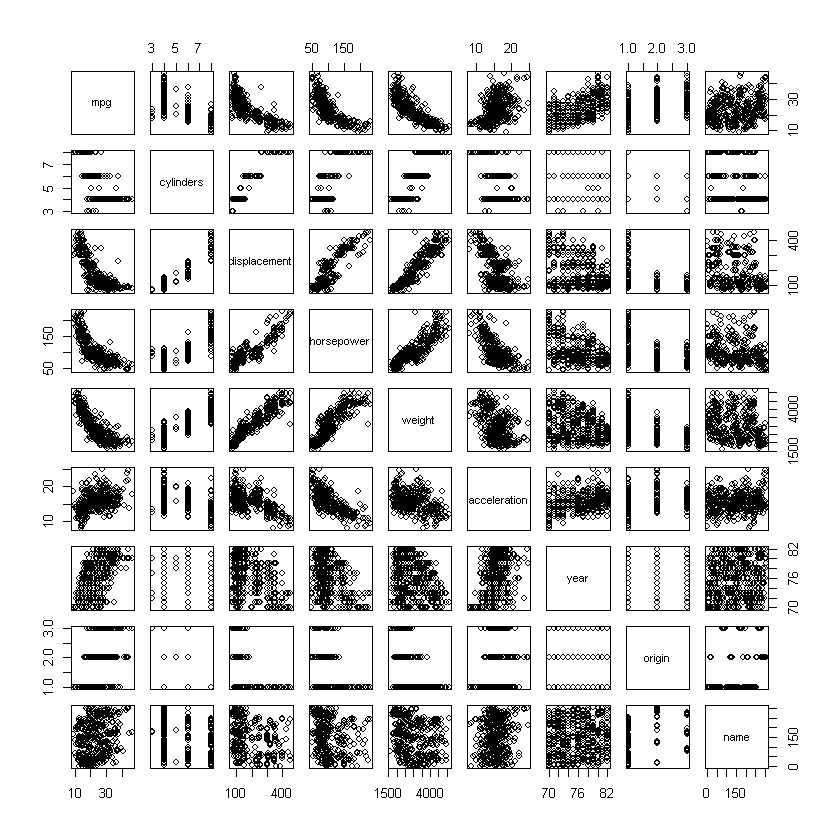

In [8]:
pairs(auto)

## Task (b)
Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [9]:
cor(auto[, names(auto) !="name"])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


## Task (c)
Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.

In [10]:
linear_model = lm(mpg ~. -name, data = Auto)
summary(linear_model)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


### I. Is there a relationship between the predictors and the response?
**Definitely yes**. Because p-value is close to zero (p-value < 2.2e-16) and $R^2$ is relatively high ($R^2$ = 0.8182)
### II. Which predictors appear to have a statistically significant relationship to the response?
In descending order: ***Weight, Year, Origin, Displacement*** (based on p-value of each predictor)
### III. What does the coefficient for the year variable suggest?
The MPG value increases with the Year.